In [12]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.externals import joblib
# plot feature importance using built-in function
from xgboost import plot_importance
from matplotlib import pyplot

In [13]:
# pour le save
# joblib.dump(xgb_model, "xgb_labels_encoding_improved.pkl", compress=9)
# joblib.dump(xgb_model, "xgb_ordinal_encoding_improved.pkl", compress=9)
# joblib.dump(xgb_model, "xgb_with_hour_binned_improved.pkl", compress=9)
# joblib.dump(xgb_model, "xgb_with_all_variables_hour_soleil_temp_binned_improved.pkl", compress=9)


# pour le reload
mymodel = joblib.load("xgb_with_hour_binned_improved.pkl")

In [14]:
print(mymodel.feature_importances_)

[0.00539358 0.01439283 0.01009456 0.02225218 0.00586902 0.29149413
 0.24932057 0.0092098  0.01148663 0.01916156 0.03032271 0.05001526
 0.12162092 0.15936622]


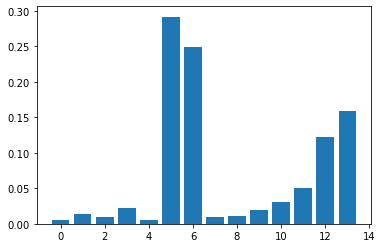

In [15]:
# plot
pyplot.bar(range(len(mymodel.feature_importances_)), mymodel.feature_importances_)
pyplot.show()

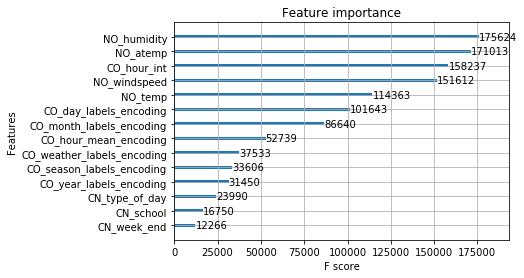

In [8]:
# plot feature importance
plot_importance(mymodel)
pyplot.show()

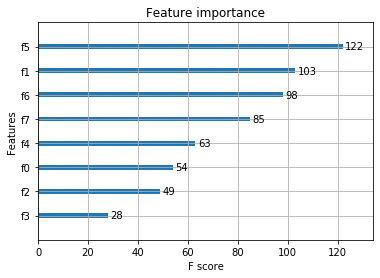

In [15]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
y = dataset[:,8]
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()

In [25]:
# use feature importance for feature selection
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    
    print ("Use of threshold", thresh)
    print ("Dim de select_X_train",select_X_train.shape)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 77.95%
Use of threshold 0.0775613
Dim de select_X_train (514, 1)
Thresh=0.078, n=8, Accuracy: 77.95%
Use of threshold 0.08040861
Dim de select_X_train (514, 8)
Thresh=0.080, n=7, Accuracy: 76.38%
Use of threshold 0.08493615
Dim de select_X_train (514, 7)
Thresh=0.085, n=6, Accuracy: 77.56%
Use of threshold 0.09472006
Dim de select_X_train (514, 6)
Thresh=0.095, n=5, Accuracy: 76.38%
Use of threshold 0.1021471
Dim de select_X_train (514, 5)
Thresh=0.102, n=4, Accuracy: 76.38%
Use of threshold 0.10865614
Dim de select_X_train (514, 4)
Thresh=0.109, n=3, Accuracy: 74.80%
Use of threshold 0.15973376
Dim de select_X_train (514, 3)
Thresh=0.160, n=2, Accuracy: 75.98%
Use of threshold 0.29183695
Dim de select_X_train (514, 2)
Thresh=0.292, n=1, Accuracy: 70.08%


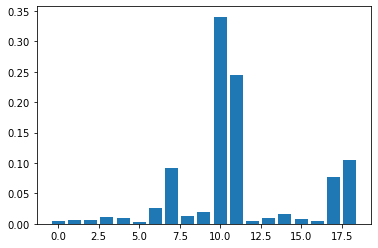

In [86]:
mymodel = joblib.load("xgb_with_all_variables_hour_soleil_temp_binned_improved.pkl")
# plot
pyplot.bar(range(len(mymodel.feature_importances_)), mymodel.feature_importances_)
pyplot.show()

In [88]:
print(mymodel.feature_names_)

AttributeError: 'XGBRegressor' object has no attribute 'feature_names_'

In [70]:
print(mymodel.feature_importances_)

[0.00395433 0.00700547 0.00642468 0.01052634 0.00917622 0.00365176
 0.02652456 0.09201382 0.01244843 0.0196626  0.3403793  0.2439614
 0.0043954  0.00894001 0.01532947 0.00721783 0.00506817 0.07763257
 0.10568758]


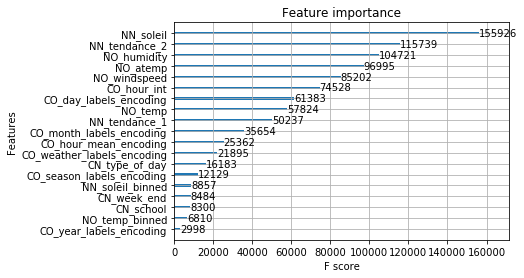

In [92]:
# plot feature importance
plot_importance(mymodel)
pyplot.show()

In [ ]:
https://stackoverflow.com/questions/46943314/xgboost-plot-importance-doesnt-show-feature-names

In [82]:
df_train_for_cv_used = pd.read_pickle("../data/df_train_for_cv_o_n_all_variables.pkl")
all_var_x = [each for each in list(df_train_for_cv_used) if each != "count" and each != "datetime"]

X_train = df_train_for_cv_used[all_var_x]
Y_train = df_train_for_cv_used[["count"]]

# Calcul des Y = log(Y + 1)
Y_train['log_count'] = Y_train['count'].map(lambda x: np.log1p(x))
Y_train = Y_train.drop("count", axis = 1)

var_to_keep = ['CN_school',
 'NO_atemp',
 'NO_humidity',
 'NO_temp',
 'NO_temp_binned',           
 'NO_windspeed',
 'NN_soleil',
 'NN_tendance_1',
 'NN_tendance_2',
 'CO_hour_int',
 'NN_soleil_binned',
 'CO_hour_mean_encoding',
 'CO_month_labels_encoding',
 'CO_day_labels_encoding',
 'CO_weather_labels_encoding',
 'CO_season_labels_encoding',
 'CO_year_labels_encoding',
 'CN_type_of_day',
 'CN_week_end']

/home/osboxes/anaconda3/envs/data/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [83]:
X_train = X_train[var_to_keep]

In [84]:
X_train.head()

CN_school  NO_atemp  NO_humidity  NO_temp  NO_temp_binned  NO_windspeed  \
0          0    14.395           81     9.84               0           0.0   
1          0    13.635           80     9.02               0           0.0   
2          0    13.635           80     9.02               0           0.0   
3          0    14.395           75     9.84               0           0.0   
4          0    14.395           75     9.84               0           0.0   

   NN_soleil  NN_tendance_1  NN_tendance_2  CO_hour_int  NN_soleil_binned  \
0 -68.036186       0.418093              0            0                 0   
1 -73.948688       0.418093              0            1                 0   
2 -71.066026       0.418093              0            2                 0   
3 -62.016308       0.418093              0            3                 0   
4 -50.973158       0.418093              0            4                 0   

   CO_hour_mean_encoding  CO_month_labels_encoding  CO_day_labels_encoding  \
0                      0                         4                       2   
1                      0                         4                       2   
2                      0                         4                       2   
3                      0                         4                       2   
4                      0                         4                       2   

   CO_weather_labels_encoding  CO_season_labels_encoding  \
0                           0                          2   
1                           0                          2   
2                           0                          2   
3                           0                          2   
4                           0                          2   

   CO_year_labels_encoding  CN_type_of_day  CN_week_end  
0                        0               2            1  
1                        0               2            1  
2                        0               2            1  
3                        0               2            1  
4                        0               2            1

In [66]:
# On renomme les variables = PAS BESOIN
# X_train.columns = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18']


In [78]:
print(mymodel.feature_importances_)

[0.00395433 0.00700547 0.00642468 0.01052634 0.00917622 0.00365176
 0.02652456 0.09201382 0.01244843 0.0196626  0.3403793  0.2439614
 0.0043954  0.00894001 0.01532947 0.00721783 0.00506817 0.07763257
 0.10568758]


In [67]:
X_train.head()

f0      f1  f2    f3  f4   f5         f6        f7  f8  f9  f10  f11  f12  \
0   0  14.395  81  9.84   0  0.0 -68.036186  0.418093   0   0    0    0    4   
1   0  13.635  80  9.02   0  0.0 -73.948688  0.418093   0   1    0    0    4   
2   0  13.635  80  9.02   0  0.0 -71.066026  0.418093   0   2    0    0    4   
3   0  14.395  75  9.84   0  0.0 -62.016308  0.418093   0   3    0    0    4   
4   0  14.395  75  9.84   0  0.0 -50.973158  0.418093   0   4    0    0    4   

   f13  f14  f15  f16  f17  f18  
0    2    0    2    0    2    1  
1    2    0    2    0    2    1  
2    2    0    2    0    2    1  
3    2    0    2    0    2    1  
4    2    0    2    0    2    1

In [85]:
from numpy import sort
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train,test_size = 0.3,random_state = 0)

# columns=feature_names

learning_rate_value = 0.005555857142857143
n_estimators_value = 3213

# mymodel_instance
xgb_model = xgb.XGBRegressor(
            colsample_bytree = 0.665492,
            learning_rate = learning_rate_value,
            max_depth = 15,
            n_estimators = n_estimators_value,
            subsample = 0.581242,
            n_jobs = 4,
            # min_child_weight = 37,
            min_child_weight = 5,
            reg_lambda = 16.220194,
            objective="reg:squarederror")
# fit model on all training data
xgb_model.fit(X_train, Y_train)

# make predictions for test data and evaluate
y_pred = xgb_model.predict(X_test)
# predictions = [round(value) for value in y_pred]
# accuracy = accuracy_score(Y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))
predicted_values = xgb_model.predict(X_test)
predicted_values = np.expand_dims(predicted_values, axis=1)
RMSE_test_value = np.sqrt(np.mean((predicted_values - Y_test.values)**2, axis=0))

print ("RMSE_test_value using all possible predictors: %.2f%%" % (RMSE_test_value * 100.0))


# Fit model using each importance as a threshold
thresholds = sort(xgb_model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb_model, threshold=thresh, prefit=True) 
    # print ("X_train", X_train.shape)
    select_X_train = selection.transform(X_train)
    
    # train model
    selection_model = xgb.XGBRegressor(
            colsample_bytree = 0.665492,
            learning_rate = learning_rate_value,
            max_depth = 15,
            n_estimators = n_estimators_value,
            subsample = 0.581242,
            n_jobs = 4,
            # min_child_weight = 37,
            min_child_weight = 5,
            reg_lambda = 16.220194,
            objective="reg:squarederror")
    selection_model.fit(select_X_train, Y_train)
    # eval model
    # print ("X_test",X_test.shape)
    # print ("X_test", type(X_test))
    select_X_test = selection.transform(X_test)
    # y_pred = selection_model.predict(select_X_test)
    # predictions = [round(value) for value in y_pred]
    # accuracy = accuracy_score(y_test, predictions)
    # print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
    predicted_values = selection_model.predict(select_X_test)
    predicted_values = np.expand_dims(predicted_values, axis=1)
    RMSE_test_value = np.sqrt(np.mean((predicted_values - Y_test.values)**2, axis=0))
    accuracy = RMSE_test_value
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
    # print("Thresh= n=, Columns names, Accuracy", thresh, select_X_train.shape[1], select_X_train.names,accuracy*100.0)
    



RMSE_test_value using all possible predictors: 27.56%
Thresh=0.003, n=19, Accuracy: 27.56%
Thresh=0.003, n=18, Accuracy: 27.49%
Thresh=0.004, n=17, Accuracy: 27.34%
Thresh=0.004, n=16, Accuracy: 27.34%
Thresh=0.006, n=15, Accuracy: 27.40%
Thresh=0.007, n=14, Accuracy: 27.63%
Thresh=0.007, n=13, Accuracy: 27.86%
Thresh=0.008, n=12, Accuracy: 27.93%
Thresh=0.009, n=11, Accuracy: 30.23%
Thresh=0.011, n=10, Accuracy: 30.84%


KeyboardInterrupt: 

In [ ]:
Le meilleur modèle : 
enlever NO_temp_binned + CO_year_labels_encoding